In [54]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [56]:
datafile="SWV_Effmean.csv"
data=pd.read_csv(datafile)
print data.head()

   Depth    Eff_mean   SWV
0    1.3  124.166667   859
1    1.3  129.133333   898
2    1.5  144.033333   794
3    1.8  178.800000  1017
4    1.9  188.733333   964


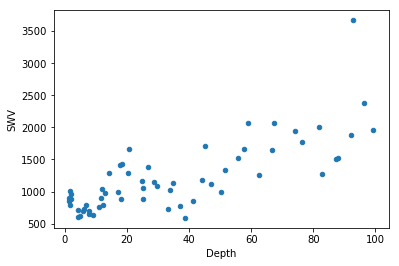

In [58]:
data.plot(kind='scatter',x='Depth',y='SWV')

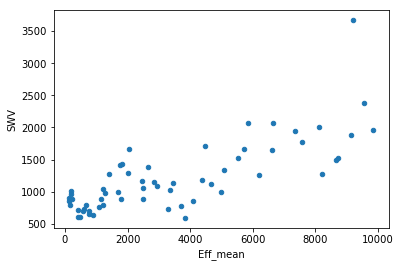

In [70]:
data.plot(kind='scatter',x='Eff_mean',y='SWV')

In [90]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import sqrt
import numpy

In [78]:
def func_depth(x, k):
    return sqrt((1000*k*sqrt(149*x*2/3)/20.88543)*1000/2387)*3.2808
#Use non-linear least squares to fit a function, f, to data.

In [72]:
def func_effmean(x, k):
    return sqrt((1000*k*sqrt(x)/20.88543)*1000/2387)*3.2808

In [73]:
data_num=data.astype(float)
xdata_dep=data_num['Depth']
xdata_effmean=data_num['Eff_mean']

In [74]:
ydata=data_num['SWV']#.applymap(float)
#ydata

In [67]:
#data_num=data.astype(float)

In [79]:
popt_dep, pcov_dep = curve_fit(func_depth, xdata_dep, ydata)
popt_eff, pcov_eff = curve_fit(func_effmean, xdata_effmean, ydata)
#Optimal values for the parameters so that the sum of the squared residuals 
# of f(xdata, *popt) - ydata is minimized

In [104]:
print "k2=",popt_dep, pcov_dep,"by Depth"
print "k2=", popt_eff, pcov_eff,"by Eff_Mean"

k2= [ 142.63037339] [[ 132.93109466]] by Depth
k2= [ 142.70884956] [[ 133.08509696]] by Eff_Mean


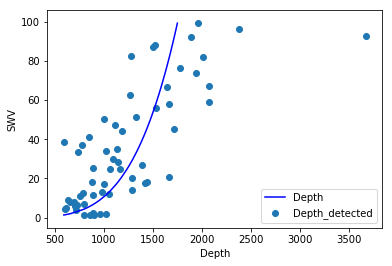

In [99]:
plt.plot(func_depth(xdata_dep, popt_dep),xdata_dep,color="blue")
plt.scatter(ydata,xdata_dep,label="Depth_detected")
plt.xlabel('Depth')
plt.ylabel('SWV')
plt.legend()
plt.show()

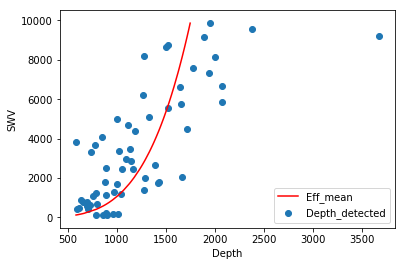

In [100]:
plt.plot(func_effmean(xdata_effmean, popt_eff),xdata_effmean,color="red")
plt.scatter(ydata,xdata_effmean,label="Depth_detected")
plt.xlabel('Depth')
plt.ylabel('SWV')
plt.legend()
plt.show()

In [101]:
import numpy
residuals = ydata- func_effmean(xdata_effmean, popt_eff)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
print r_squared, "Eff_mean_R2"

0.46685367418 Eff_mean


In [103]:
residuals = ydata- func_depth(xdata_dep, popt_dep)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)
r_squared = 1 - (ss_res/ss_tot)
print r_squared,"Depth_R2"

0.46688175743 Depth_R2


In [111]:
residuals = ydata- func_depth(xdata_dep, 200)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)
r_squared = 1 - (ss_res/ss_tot)
print r_squared,"Depth_R2"

0.27929557112 Depth_R2


In [105]:
print numpy.corrcoef(func_depth(xdata_dep, popt_dep),ydata), "Correlation, Depth"

[[ 1.         0.6869273]
 [ 0.6869273  1.       ]]


In [106]:
print numpy.corrcoef(func_effmean(xdata_effmean, popt_eff),ydata), "Correlation, Eff_mean"

[[ 1.          0.68679001]
 [ 0.68679001  1.        ]] Correlation, Eff_mean


In [108]:
print numpy.corrcoef(func_effmean(xdata_effmean, 562),ydata), "Correlation, Eff_mean"

[[ 1.          0.68679001]
 [ 0.68679001  1.        ]] Correlation, Eff_mean
